In [119]:
# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data


In [120]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [121]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [122]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [123]:
# Create a Beautiful Soup Object
#[browser.html]: gathers the HTML content
#[soup(html,'html.parser')]: parses the HTML
html = browser.html
mars_soup = soup(html, 'html.parser')

In [124]:
# Extract all rows of data
#[.find('table', class_=)] to locate all HTML tags that match the parameters
table = mars_soup.find('table', class_='table')
#[.findall('tr')] to locate all HTML tags that match the parameters
rows = table.find_all('tr')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [125]:
# Create an empty list
# Created 'data_rows' to hold a []
data_rows = []
# Loop through the scraped data to create a list of rows
# For Loop iterating through each row containing 'td' tags
for row in rows[1:]:
    columns = row.find_all('td')
    #[text.strip()] to get rid of leading or ending tags
    row_data = [col.text.strip() for col in columns]
    #[.append()] adding the data into the 'data_rows' list
    data_rows.append(row_data)


In [126]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Created a variable to hold all titles for columns
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
#[pd.DataFrame()] to  created a Pandas DataFrame with the list of rows and list of columns
Mars_df = pd.DataFrame(data_rows, columns=column_names)


In [127]:
# Confirm DataFrame was created successfully
#[.head()] displays just the top five
#[print()] prints out a message
print(Mars_df.head())


   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [128]:
# Examine data type of each column
#[print()] to print out messages
#[df.types] to check out the dtype of values
print(Mars_df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [129]:
# Change data types for data analysis
#[pd.to_datetime()] to change the data type to a date time datatype
Mars_df['terrestrial_date'] = pd.to_datetime(Mars_df['terrestrial_date'])
#[.astype()] to change each 'object' datatype to a 'float' datatype 
Mars_df[['sol', 'ls', 'month', 'min_temp', 'pressure']] = Mars_df[['sol', 'ls', 'month', 'min_temp', 'pressure']].astype(float)


In [130]:
# Confirm type changes were successful by examining data types again
#[print()] to print out a message
print(Mars_df.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                        float64
ls                         float64
month                      float64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [131]:
# 1. How many months are there on Mars?
#[.value_counts()] to count up the different values
#[.sort_index()] to sort the data from to sort the data from lowest to highest
num_months = Mars_df['month'].value_counts()
num_months_sorted = num_months.sort_index()
print(f"Number of months on Mars: {num_months_sorted}")


Number of months on Mars: month
1.0     174
2.0     178
3.0     192
4.0     194
5.0     149
6.0     147
7.0     142
8.0     141
9.0     134
10.0    112
11.0    138
12.0    166
Name: count, dtype: int64


In [132]:
# 2. How many Martian days' worth of data are there?
#[.nunique()] to figure out unique values in the dataset
num_martian_days = Mars_df['sol'].nunique()
#[print()] to print a message out
print(f"Number of Martian days' worth of data: {num_martian_days}")

Number of Martian days' worth of data: 1867


In [133]:
# 3. What is the average low temperature by month?
#[.groupby()] from the DataFrame we group by the month and temp and calculate the mean using 
#[.mean()]
average_temp_by_month = Mars_df.groupby('month')['min_temp'].mean()
average_temp_by_month

month
1.0    -77.160920
2.0    -79.932584
3.0    -83.307292
4.0    -82.747423
5.0    -79.308725
6.0    -75.299320
7.0    -72.281690
8.0    -68.382979
9.0    -69.171642
10.0   -71.982143
11.0   -71.985507
12.0   -74.451807
Name: min_temp, dtype: float64

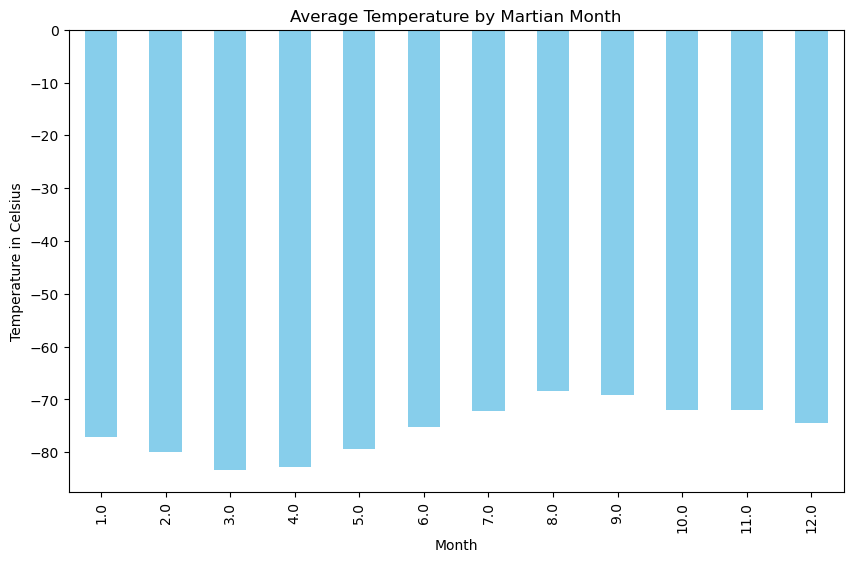

In [134]:
# Plot the average temperature by month
# Used matplotlib functions such as [plt.figure(),plt.title(),plt.xlabel(),plt.ylabel(),plt.show()] to create a bar graph
plt.figure(figsize=(10, 6))
average_temp_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Temperature by Martian Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()


Coldest month on Mars: 3.0
Hottest month on Mars: 8.0


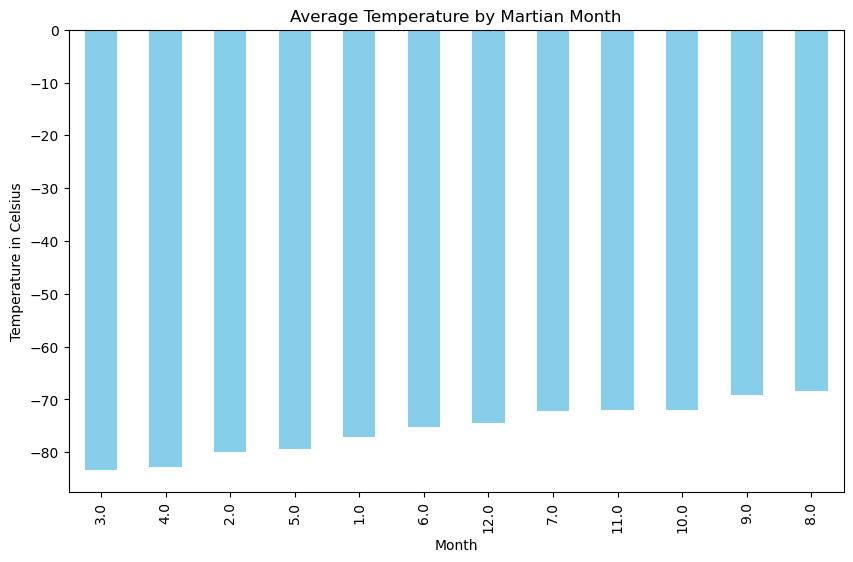

In [135]:
# Identify the coldest and hottest months in Curiosity's location
#[.idxmin()] to find the lowest value
#[.idxmax()] to find the highest value
coldest_month = average_temp_by_month.idxmin()
hottest_month = average_temp_by_month.idxmax()
print(f"Coldest month on Mars: {coldest_month}")
print(f"Hottest month on Mars: {hottest_month}")
#[.sort_values()] to sort the data from lowest to highest
average_temp_by_month_sorted = average_temp_by_month.sort_values()
# Used matplotlib functions such as [plt.figure(),plt.title(),plt.xlabel(),plt.ylabel(),plt.show()] to create a bar graph
plt.figure(figsize=(10, 6))
average_temp_by_month_sorted.plot(kind='bar', color='skyblue')
plt.title('Average Temperature by Martian Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()



In [136]:
# 4. Average pressure by Martian month
#[.groupby()] from the DataFrame we group by the month and pressure and calculate the mean using 
#[.mean()]
average_pressure_by_month = Mars_df.groupby('month')['pressure'].mean()
# Displaying the data
average_pressure_by_month

month
1.0     862.488506
2.0     889.455056
3.0     877.322917
4.0     806.329897
5.0     748.557047
6.0     745.054422
7.0     795.105634
8.0     873.829787
9.0     913.305970
10.0    887.312500
11.0    857.014493
12.0    842.156627
Name: pressure, dtype: float64

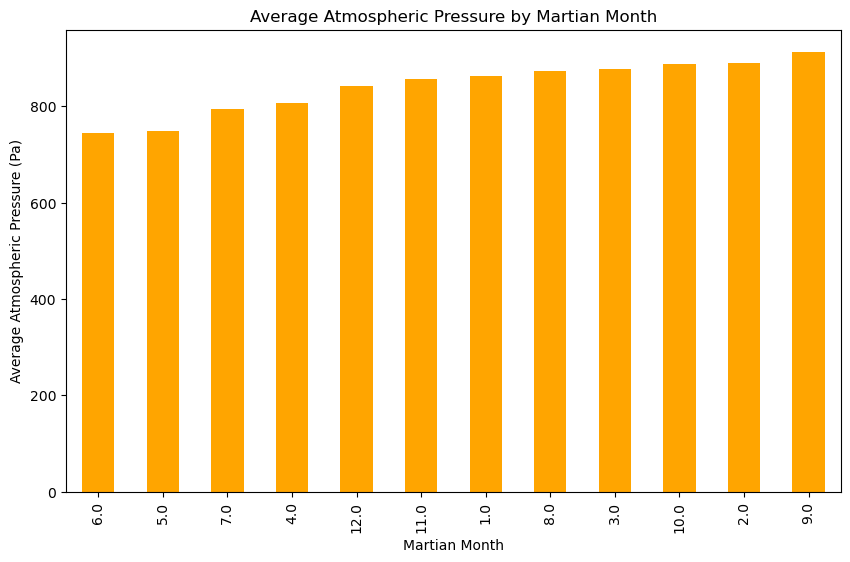

In [137]:
# Plot the average pressure by month
#[.sort_values()] to sort the data from lowest to highest
average_pressure_by_month_sorted = average_pressure_by_month.sort_values()

# Used matplotlib functions such as [plt.figure(),plt.title(),plt.xlabel(),plt.ylabel(),plt.show()] to create a bar graph
plt.figure(figsize=(10, 6))
average_pressure_by_month_sorted.plot(kind='bar', color='orange',)
plt.title('Average Atmospheric Pressure by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.show()


In [138]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#[.nunique()] to figure out unique values in the dataset
terrestrial_days_in_martian_year = Mars_df['terrestrial_date'].nunique()

print(f"Number of terrestrial days in a Martian year: {terrestrial_days_in_martian_year}")


Number of terrestrial days in a Martian year: 1867


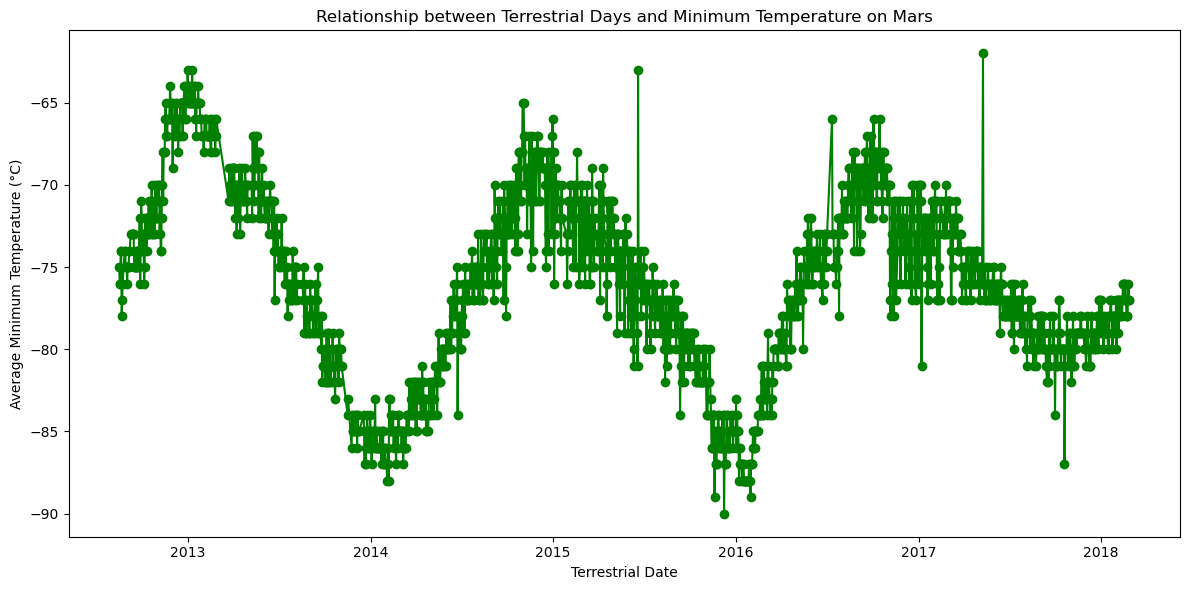

In [139]:
#[.groupby()] from the DataFrame we group by the date and min_temp and calculate the mean using 
#[.mean()]
terrestrial_days_vs_temp = Mars_df.groupby('terrestrial_date')['min_temp'].mean()
# Used matplotlib functions such as [plt.figure(),plt.title(),plt.xlabel(),plt.ylabel(),plt.show()] to create a bar graph
plt.figure(figsize=(12, 6))
plt.plot(terrestrial_days_vs_temp, marker='o', linestyle='-', color='green')
plt.title('Relationship between Terrestrial Days and Minimum Temperature on Mars')
plt.xlabel('Terrestrial Date')
plt.ylabel('Average Minimum Temperature (°C)')
plt.tight_layout()
plt.show()


1.) There are 24 months

2.) Number of Martian days' worth of data: 1867

3.) On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!

4.) Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

5.) The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [140]:
# Write the data to a CSV
#[.to_csv(name)] to save the data to a csv and give it a name
Mars_df.to_csv('mars_weather_data.csv', index=False)


In [141]:
browser.quit()